In [20]:
import torch
import matplotlib.pyplot as plt

In [38]:
# Imports
trials = 50
n=100
results = torch.load("cbohealth_rkhscbo_ntrial={0}_n={1}.pt".format(trials,n), 
                     weights_only = True)

# Getting dimensions and names
n_result = len(results)
n_model = int(n_result/trials)

names = []
for i in range(n_result):
    if results[i]['name'] not in names:
        names.append(results[i]['name'])

In [39]:
EYdoX_eval = torch.zeros((len(results[0]['EYdoXeval']), trials, n_model))
for m in range(n_model):
    for t in range(trials):
        EYdoX_eval[:,t,m] = results[trials*m + t]['EYdoXeval'][:,0]

doX_eval = torch.zeros((len(results[0]['doXeval']), trials, n_model))
for m in range(n_model):
    for t in range(trials):
        doX_eval[:,t,m] = results[trials*m + t]['doXeval'][:,0]

In [40]:
# Getting best values
iters = len(results[0]['EYdoXeval'])
best_eval = torch.zeros((iters, trials, n_model))
for m in range(n_model):
    for t in range(trials):
        for i in range(iters):
            if i == 0:
                best_eval[i,t,m] = EYdoX_eval[i,t,m] 
            else:
                if EYdoX_eval[i,t,m] < best_eval[:i,t,m].min():
                    best_eval[i,t,m] = EYdoX_eval[i,t,m]   
                else:
                     best_eval[i,t,m] =  best_eval[i-1,t,m] 

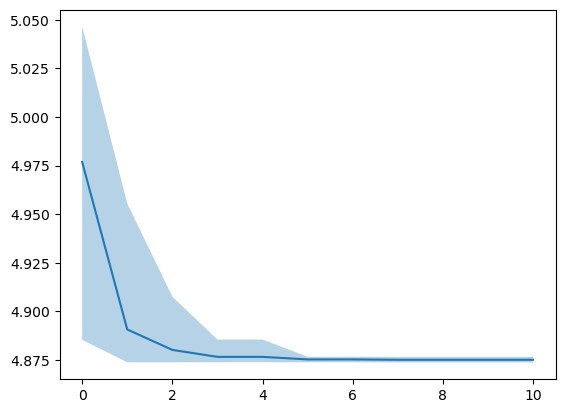

In [41]:
i=11
plt.plot(best_eval[...,m].mean(1)[:i])
plt.fill_between(torch.arange(min(len(EYdoX_eval),i)),best_eval[...,m].quantile(0.05,1)[:i],
                 best_eval[...,m].quantile(0.95,1)[:i], alpha = 0.33)    